# Lasso Regularization with multiple feature dataset practise

The loss function for a multiple linear regression case with m features looks as follows: 

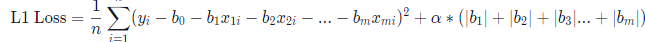


In this practise I am going to examine this by reapplying a multiple linear regression model to the student performance dataset (I worked on earlier) — this time I am going to do this with L1 regularization. 

* Original unregularized coefficients look as shown in the image below:

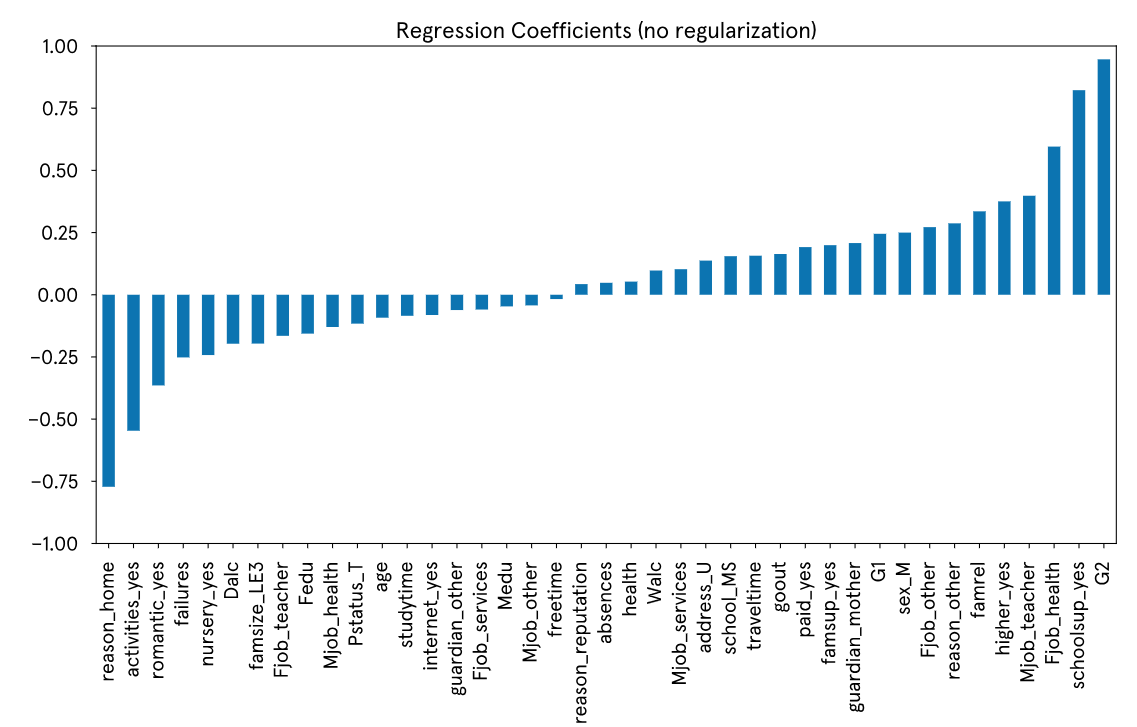

* too many features possibly (from the number of columns in the DataFrame)
* testing error is higher than training error (by looking at the MSE)
* highly negatively correlated features (inferred from the plot of the coefficients)

Practise 1: 

I will be implemening Lasso for this dataset by importing the Lasso module within scikit-learn‘s class of ‘linear_models. I am choosing a value of s by setting alpha to 0.1 - the scikit-learn default is 1. Below is the code to do a train-test split, implementing regression with Lasso regularization and calculating the training error. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helpers


df = pd.read_csv("./student_math.csv")
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])
#Here, the target variable y is set to the ‘Final_Grade’ column of the DataFrame, and the features X are all the other columns except ‘Final_Grade’.

# 1. Train-test split and fitting an l1-regularized regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#This splits the data into training and testing sets. X_train and y_train are the features and target for the training set, 
# and X_test and y_test are for the testing set. The test set size is 33% of the original data.

#Fitting a Lasso Regression Model to the training data.
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
#Alpha: The alpha parameter determines how much regularization is applied. 
# A higher alpha means more regularization, which can lead to simpler models with more coefficients set to zero
#In this case, alpha = 0.1 is a moderate amount of regularization. It’s not too high to overly simplify the model, and not too low to have no effect

l1_pred_train = lasso.predict(X_train)
l1_mse_train = np.mean((l1_pred_train - y_train)**2)
print("Lasso (L1) Training Error: ", l1_mse_train)
#he MSE is a measure of the average squared difference between the predicted values and the actual values

# 2. Calculate testing error
l1_pred_test = None
l1_mse_test = None


# 3. Plotting the Coefficients
# predictors = X.columns
# coef = pd.Series(lasso.coef_,predictors).sort_values()
# plt.figure(figsize = (12,8))
# plt.ylim(-1.0,1.0)
# coef.plot(kind='bar', title='Regression Coefficients with Lasso (L1) Regularization')


1. Answer: Lasso (L1) Training Error:  3.0118464559476825 (an indication of how well the model has fit the training data.)

Practise 2:

Following the syntax for training error, calculate the testing error using the following steps:

set the variable l1_pred_test equal to the result of applying the model to X_test
set the variable l1_mse_test equal to the Mean Squared Error of the test data
print l1_mse_test
The training and test Mean Squared Errors obtained from implementing the regression without regularization were 2.627 and 4.987 (rounded to three decimals!) respectively. How do the new errors compare?



In [ ]:
# 2. Calculate testing error
l1_pred_test = lasso.predict(X_test)
l1_mse_test = np.mean((l1_pred_test - y_test)**2)
print("Lasso (L1) Testing Error: ", l1_mse_test)

2. Answer: 4.272174214435373

Explanation: an indication of how well the model’s predictions match the actual values in the testing set.

I see how the training error went up but the test error went down, which makes sense as the model is performing slightly better on test data at the cost of performing slightly worse on training data.

Practise 3:

 What do the coefficients look like post Lasso regularization? 


In [ ]:
# 3. Plotting the Coefficients
predictors = X.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Regression Coefficients with Lasso (L1) Regularization')

3. Answer: 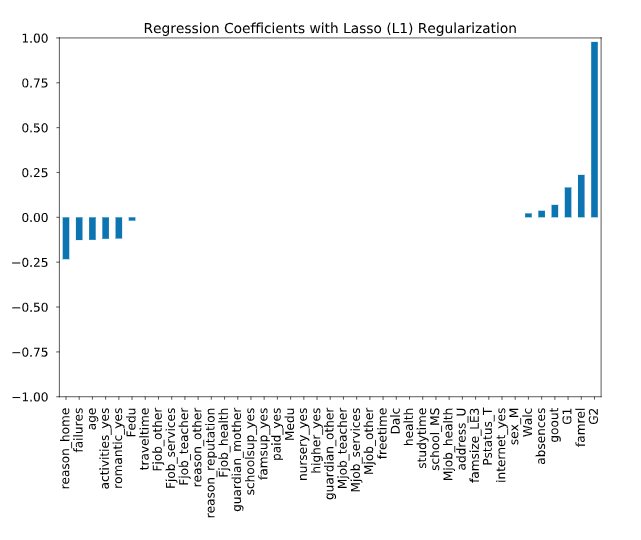

Explaination: Lasso has shrunk more than half of the coefficients to zero! Additionally, while the value of all the coefficients have shrunk, Lasso has increased the relative importance of some. An important thing to note here is that I manually set the value of alpha to 0.1. The number of features that get eliminated due to Lasso is definitely tied to the value of alpha